# Traffic Behavior in Sao Paolo
Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
traffic = pd.read_csv('traffic_sao_paulo.csv', sep = ';')
print(traffic.head(5))
print(traffic.tail(5))
print(traffic.info())

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   
2             3                0             0               0   
3             4                0             0               0   
4             5                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   
2                0             0              0                             0   
3                0             0              0                             0   
4                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0       

we read in our dataset about urban traffic in São Paulo. Let's now start exploring the data.

*our goal here is to determine the factors that cause the `traffic slowness` in São Paulo to worsen.*

**Let's begin by exploring the `Slowness in traffic (%)` column.**

The data type of this column is object, so we converted it to a float

In [3]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [5]:
print(traffic['Slowness in traffic (%)'].describe())

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64


We can observe that the `traffic slowness ranges from 3.4 % to 23%`, with an `average of 10.05%` and `25% of the values are under 7.4%`, `50% are under 9.0%` and `75% are under 11.85%`

To get a better sense of the distribution of the values, let's plot a histogram. 

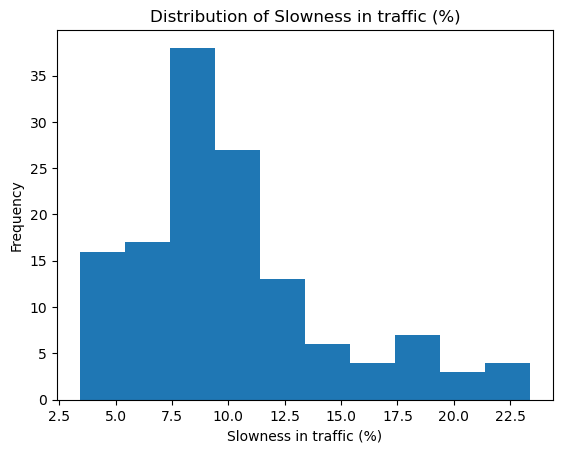

In [10]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

So far, we've examined the distribution of the Slowness in traffic (%) column. Recall that our goal here is to determine the factors that worsen the traffic slowness in São Paulo.

With the exception of the `Hour (Coded`) and `Slowness in traffic (%)` columns, all the columns describe incident types related to traffic slowness: immobilized buses, broken trucks, accidents with victims, fire, manifestations, etc.

Each one of these columns records the number of incidents reported at the time of registering the data. If we sum all the values in a column, we can get the total number of incidents that happened between December 14, 2009 and December 18, 2009 — from Monday to Friday.

Let's calculate the sums for all the incident columns so we can compare them, we start by isolating the incidents and then calcultaing the sum

In [12]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis = 1)
print(incidents.sum())

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64


Let's generate a bar graph to better compare the incidents columns

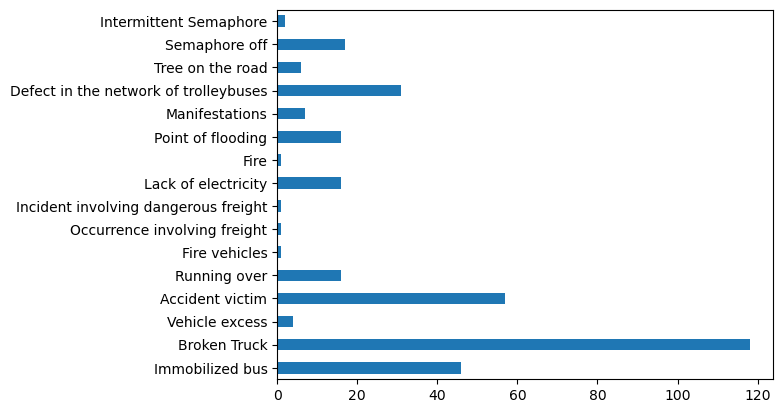

In [14]:
incidents.sum().plot.barh()
plt.show()

To get an accurate picture about each incident type and its relationship with traffic slowness, we can look up a few correlation values

In [15]:
print(traffic.corr()['Slowness in traffic (%)'])

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64


We can observe that it most strongly correlates with `Lack of electricity : 0.4365`, `Point of flooding : 0.420016`, and `Semaphore off` columns

Let's start by generating, scatterplots for these columns to better understand the correlations

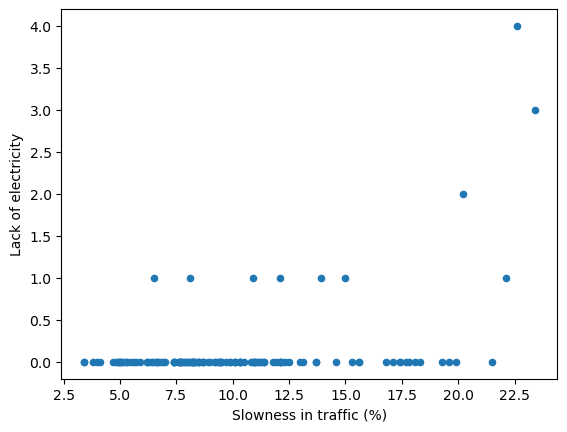

In [16]:
traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Lack of electricity')
plt.show()

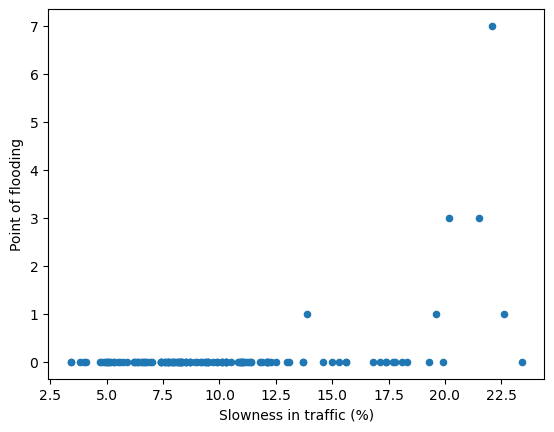

In [17]:
traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Point of flooding')
plt.show()

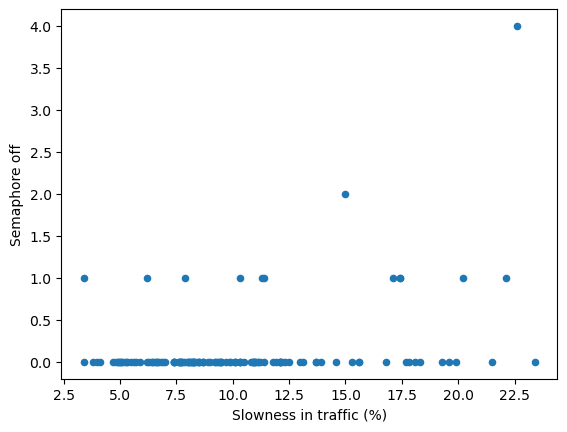

In [18]:
traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Semaphore off')
plt.show()

We identified from their positive correlation `lack of electricity`, `flooding`, and `nonfunctional semaphores` as potential factors worsening the traffic.

To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. 

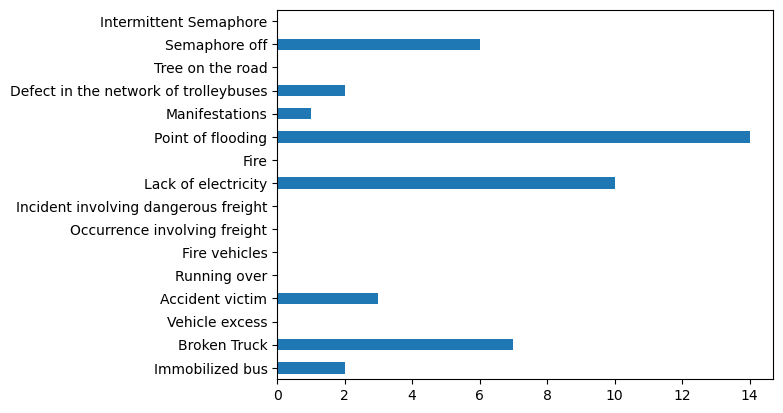

In [25]:
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20.0]
slowness_20_or_more = slowness_20_or_more.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis = 1)
incident_frequencies = slowness_20_or_more.sum()
incident_frequencies.plot.barh()
plt.show()

Looking at the Bar graph,

One conclusion is that `lack of electricity` and `flooding` are probably two factors that are causing significant traffic problems. 
If we had to communicate our results to São Paulo's administration, we could report that `lack of electricity` and `flooding cause` significant traffic problems

---

Let's now look at how traffic slowness changes over the 7:00 – 20:00 time interval.

We will start by isolating our data for each day

In [26]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

In [28]:
print(traffic_per_day['Monday'].head(3))
print('\n')
print(traffic_per_day['Monday'].tail(3))

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   
2             3                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   
2                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0                    0     0   
1                                     0                    0     0   
2                                     0                    0     0   

   Point of flooding  Manifestations  Defect in the network of trolleybuses  \
0                  0               0              

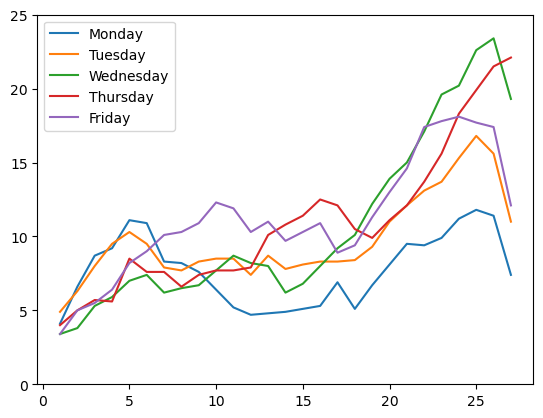

In [33]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label = day)
    plt.ylim([0,25])
    
plt.legend()
plt.show()

Let's make a grid chart so it is easier to read the line graphs.

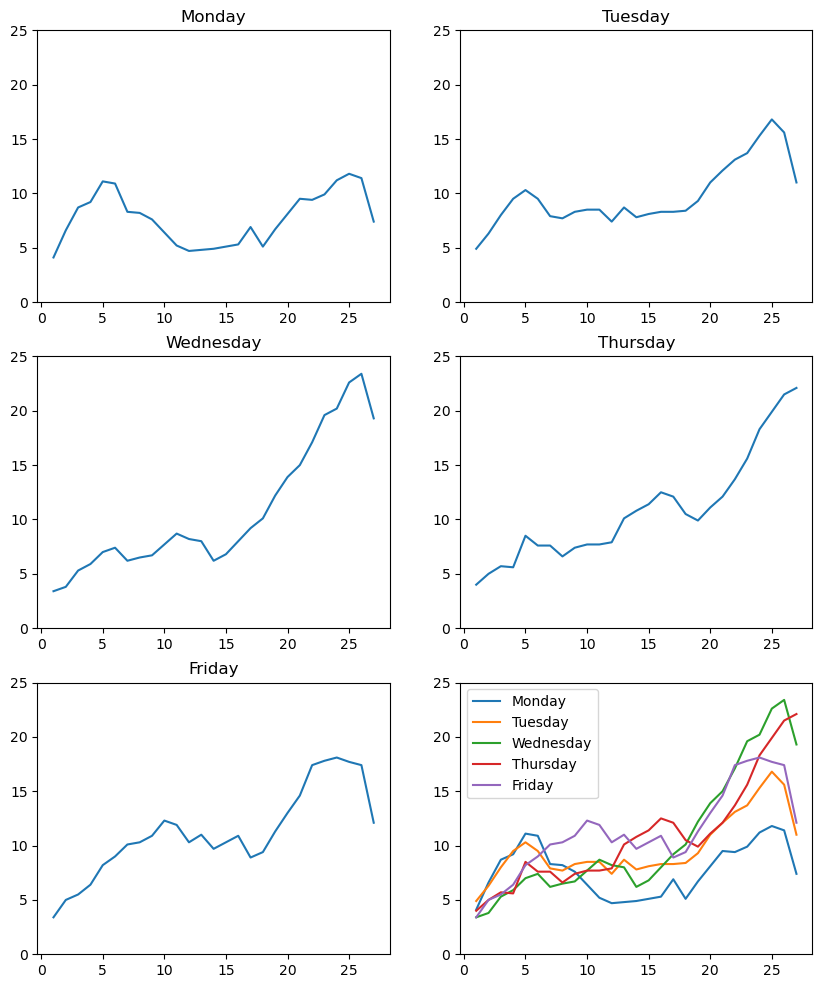

In [38]:
plt.figure(figsize = (10, 12))
for i, day in zip(range(1,7), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])

plt.subplot(3,2,6)
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label = day)
    plt.ylim([0,25])
    
plt.legend()
plt.show()